import pandas for data analysis,
import seaborn for heat map plot,
import matplotlib for plotting

In [156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as yy
from matplotlib import dates as pm
yy.use("ggplot")

read the file and show last five rows

In [173]:
data=pd.read_csv("weather.csv")
data.tail()

,date,time,temp,wspeed,wdirection,humidity,pressure,visibility,Unnamed: 8
8644,31-Dec-2020,19:00,12,6.0,↑,77,1018,6.0,NaN
8645,31-Dec-2020,20:00,11,0.0,↑,77,1018,6.0,NaN
8646,31-Dec-2020,21:00,11,0.0,↑,77,1019,6.0,NaN
8647,31-Dec-2020,22:00,10,6.0,↑,82,1019,6.0,NaN
8648,31-Dec-2020,23:00,9,0.0,↑,87,1019,6.0,NaN


show a quick describtion of the data

In [158]:
data.describe()

,temp,wspeed,humidity,pressure,visibility,Unnamed: 8
count,8649.000000,8639.000000,8649.000000,8649.000000,8398.000000,0.0
mean,18.910510,9.992939,55.142444,1015.231819,6.512384,NaN
std,8.679571,8.765068,24.148943,4.471518,3.297092,NaN
min,0.000000,0.000000,3.000000,1000.000000,0.000000,NaN
25%,11.000000,0.000000,35.000000,1012.000000,5.000000,NaN
50%,19.000000,9.000000,55.000000,1015.000000,6.000000,NaN
75%,26.000000,15.000000,77.000000,1018.000000,7.000000,NaN
max,42.000000,74.000000,100.000000,1030.000000,16.000000,NaN


In [159]:
data=data.drop("Unnamed: 8",axis=1)

convert date column datatype from object to datetime

In [160]:
data.date=pd.to_datetime(data.date)

remove minutes from time column

In [161]:
data.time=data.time.str.replace(r":.*",":00",regex=True)

new dataframe contains only the data for January

In [162]:
# jan=data[data.date.str.contains("Jan")]
jan=data[data.date.dt.month==1]
jan.tail()

,date,time,temp,wspeed,wdirection,humidity,pressure,visibility
761,2020-01-31,19:00,7,26.0,↑,61,1017,6.0
762,2020-01-31,20:00,7,32.0,↑,71,1017,6.0
763,2020-01-31,21:00,7,32.0,↑,61,1018,6.0
764,2020-01-31,22:00,7,33.0,↑,61,1018,7.0
765,2020-01-31,23:00,6,24.0,↑,66,1018,7.0


heatmap showing the temperature at all times during January

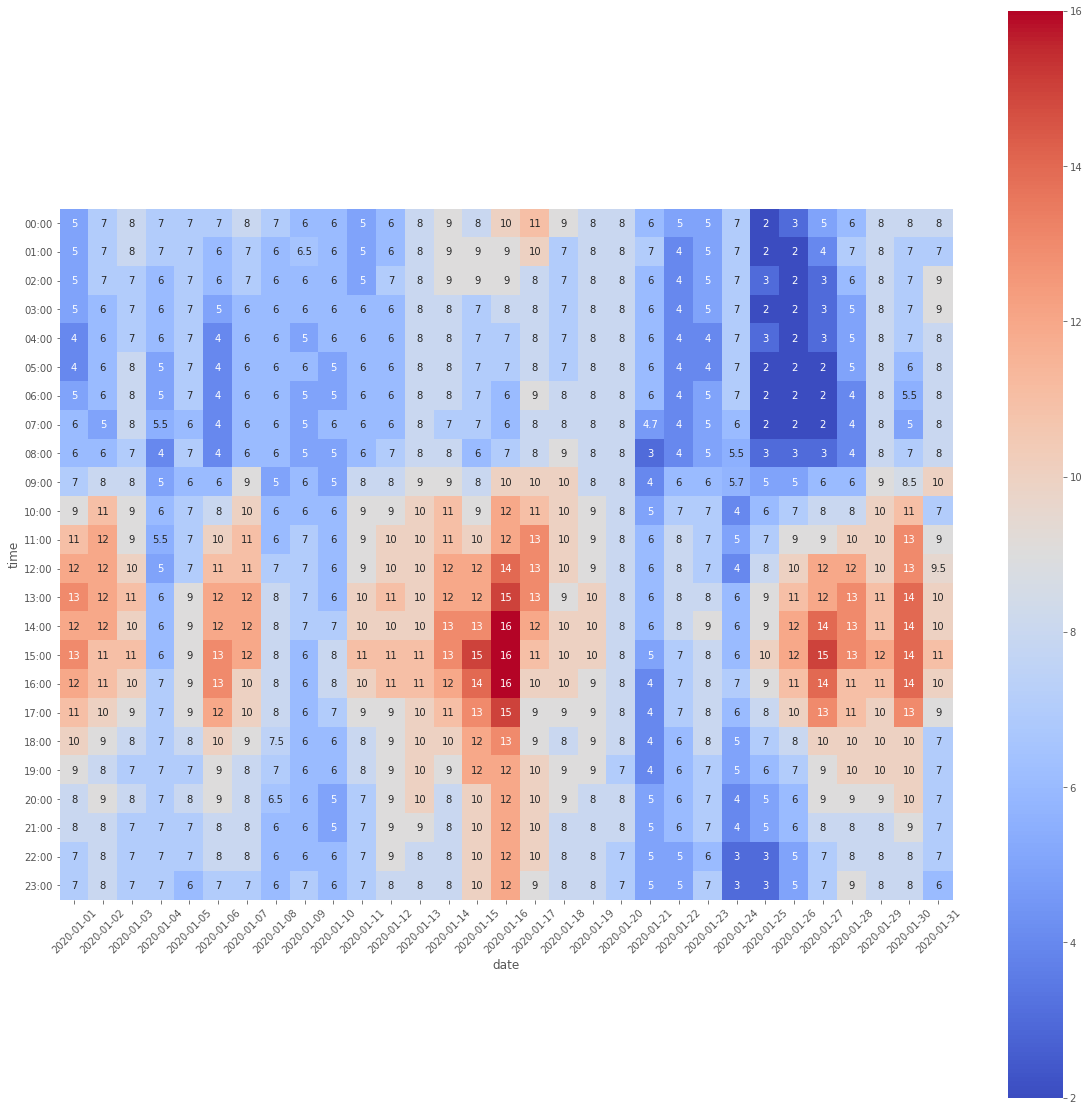

In [163]:
pivot_i=(jan.pivot_table(index="time",columns=jan.date.dt.date,values="temp"))
# # fill missing values
pivot_i.fillna(method="bfill",inplace=True)
fig,ax=plt.subplots(figsize=(20,20))
x=sns.heatmap(pivot_i,annot=True,square=True,cmap="coolwarm",yticklabels=True,xticklabels=True,ax=ax)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
xf=x.get_figure()

histogram plot of hourly temperatures all year round and january contribution

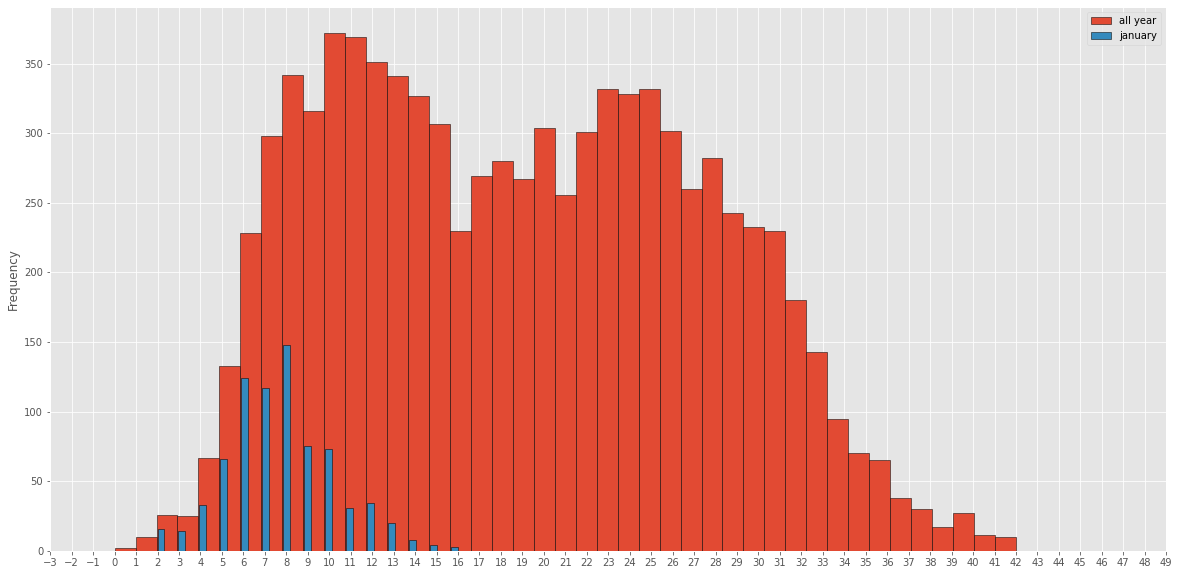

In [151]:
data.temp.plot.hist(bins=43,figsize=(20,10),edgecolor="black",label="all year")
jan.temp.plot.hist(bins=43,figsize=(20,10),edgecolor="black",label="january")
plt.xticks(range(-3,50))
plt.legend()

minimum, maximum and mean temperatures for each day during January

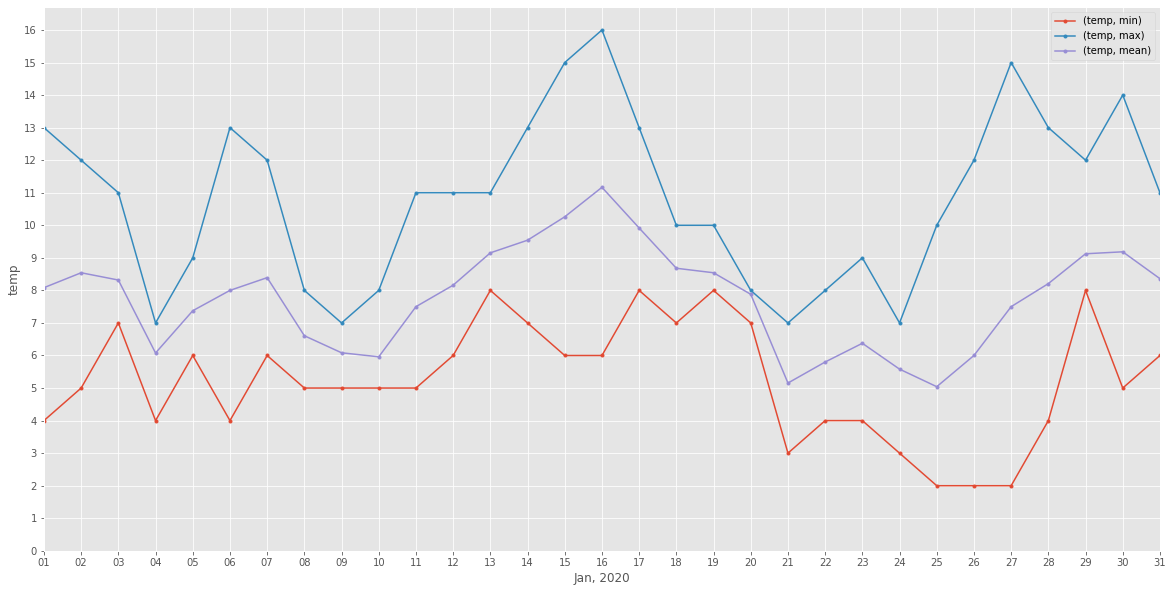

In [165]:
jan.groupby("date").agg({"temp":["min","max","mean"]}).plot(figsize=(20,10),marker=".")
plt.xticks(pd.date_range(start=("2020-1-1"),end=("2020-1-31")))
# plt.xlim([data.date(2019,12,31),data.date(2020,2,1)])
dataf=pm.DateFormatter("%d")
plt.gca().xaxis.set_major_formatter(dataf)
plt.yticks(range(17))
plt.xlabel("Jan, 2020")
plt.ylabel("temp")
plt.legend()

## ..............................................................................................
correlation map which shows a positive relationship between (temperature, visibility),(pressure, humidity) and a negative relastionship between (temperature, humidity),(temperature, pressure)

<AxesSubplot:>

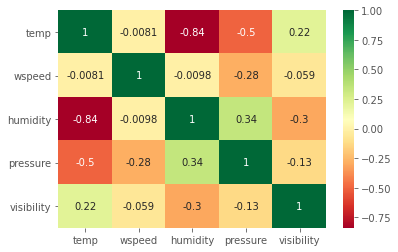

In [15]:
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")

scale down the pressure for better visuals

In [166]:
data.pressure=data.pressure-1000

subplots for positive and negative correlations on a monthly basis. humidity and temperature have a perfect inverse relationship

<AxesSubplot:xlabel='date'>

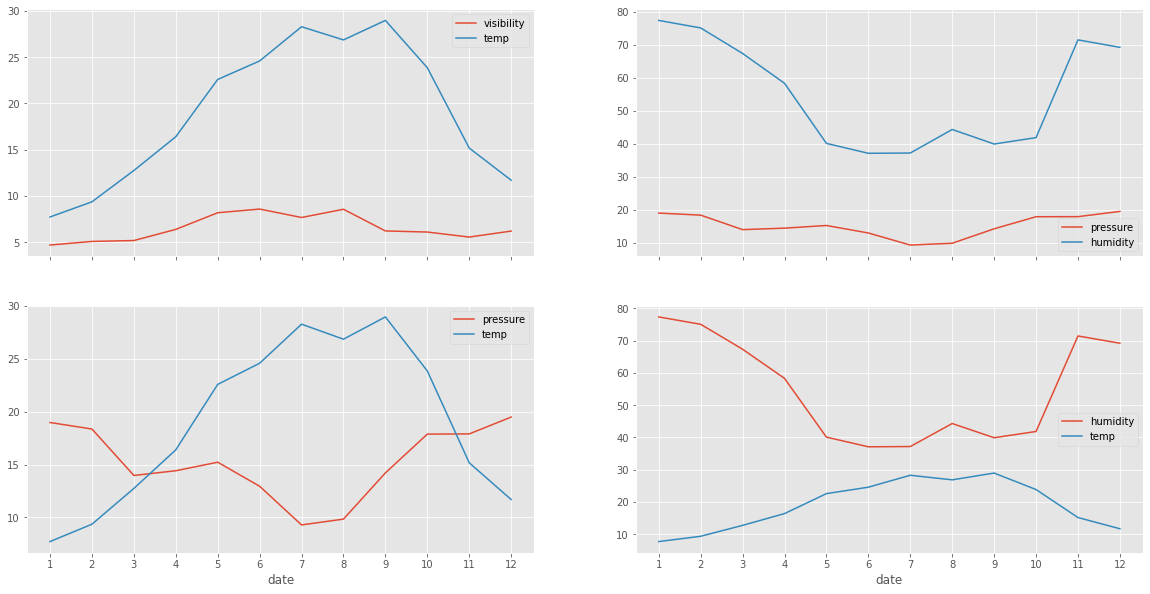

In [167]:
fig, axes= plt.subplots(2,2,sharex=True,figsize=(20,10))
plt.xticks(range(0,13))
group=data.groupby(data.date.dt.month).mean()
group[["visibility","temp"]].plot(ax=axes[0,0])
group[["pressure","humidity"]].plot(ax=axes[0,1])
group[["pressure","temp"]].plot(ax=axes[1,0])
group[["humidity","temp"]].plot(ax=axes[1,1])

seasonal charts

<AxesSubplot:>

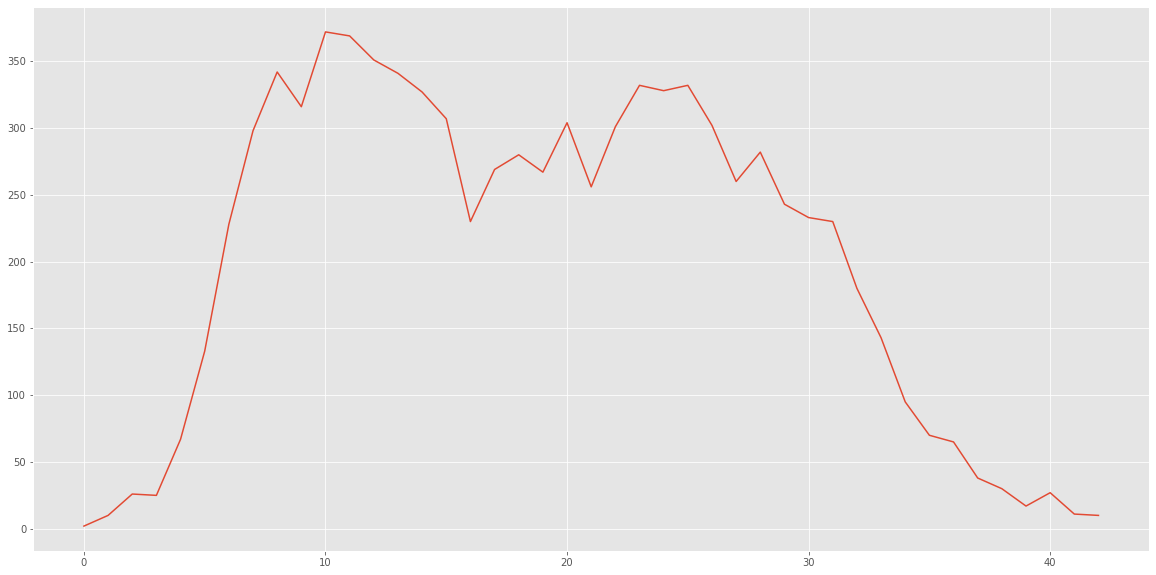

In [262]:
data.temp.value_counts().sort_index().plot(figsize=(20,10))

<AxesSubplot:xlabel='date'>

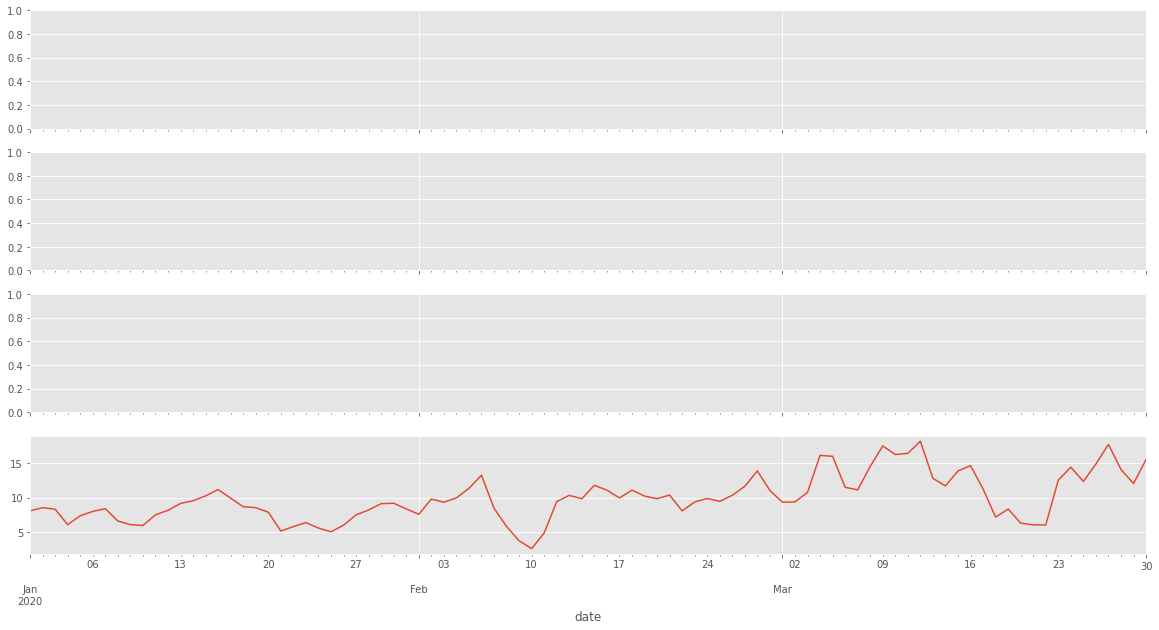

In [169]:
fig, axes= plt.subplots(4,1,sharex=True,figsize=(20,10))
temp_s=data.groupby(data.date)["temp"].mean()
# temp_s.columns="temp"
temp_s[temp_s.index<"2020-3-31"].plot()




<AxesSubplot:xlabel='date'>

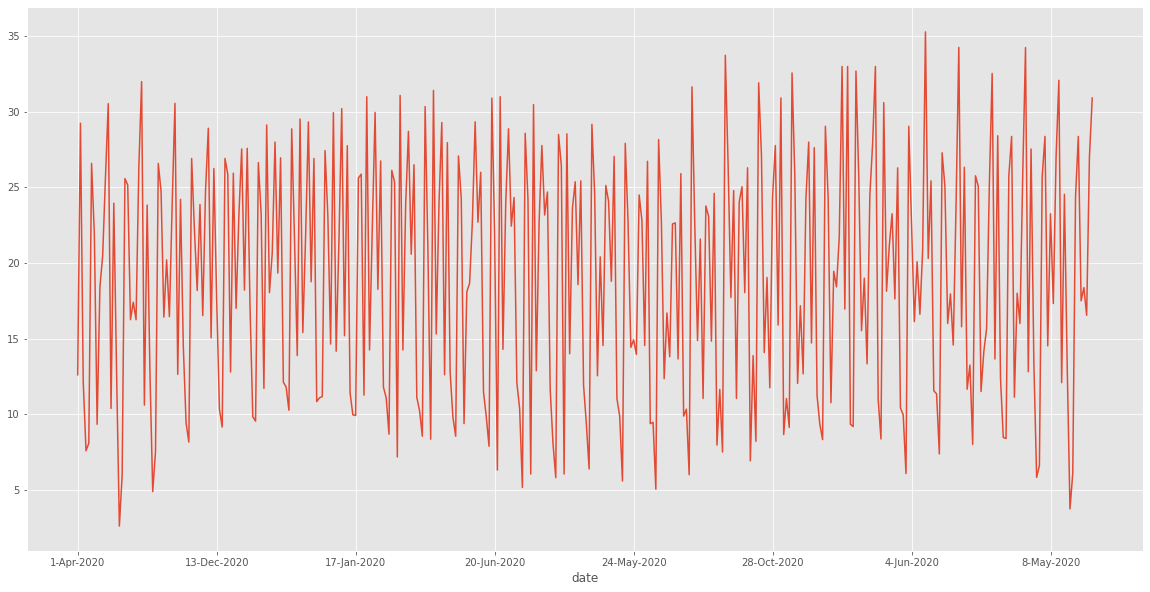

In [264]:
data.groupby(data.date)["temp"].mean().plot(figsize=(20,10))

In [171]:
datadec=pd.read_csv("weatherDec2019.csv")
datadec.head()

,date,time,temp,wspeed,wdirection,humidity,pressure,visibility,Unnamed: 8
0,1-Dec-2019,00:00,13,6,↑,59,1018,5.0,NaN
1,1-Dec-2019,01:00,13,7,↑,59,1018,5.0,NaN
2,1-Dec-2019,02:00,13,0,↑,63,1017,5.0,NaN
3,1-Dec-2019,03:00,12,7,↑,67,1017,5.0,NaN
4,1-Dec-2019,04:00,12,13,↑,67,1017,5.0,NaN


In [174]:
seasonal=pd.merge(datadec,data,how="outer")
seasonal

,date,time,temp,wspeed,wdirection,humidity,pressure,visibility,Unnamed: 8
0,1-Dec-2019,00:00,13,6.0,↑,59,1018,5.0,NaN
1,1-Dec-2019,01:00,13,7.0,↑,59,1018,5.0,NaN
2,1-Dec-2019,02:00,13,0.0,↑,63,1017,5.0,NaN
3,1-Dec-2019,03:00,12,7.0,↑,67,1017,5.0,NaN
4,1-Dec-2019,04:00,12,13.0,↑,67,1017,5.0,NaN
...,...,...,...,...,...,...,...,...,...
9413,31-Dec-2020,19:00,12,6.0,↑,77,1018,6.0,NaN
9414,31-Dec-2020,20:00,11,0.0,↑,77,1018,6.0,NaN
9415,31-Dec-2020,21:00,11,0.0,↑,77,1019,6.0,NaN
9416,31-Dec-2020,22:00,10,6.0,↑,82,1019,6.0,NaN


In [175]:
seasonal.date=pd.to_datetime(seasonal.date)
seasonal.dtypes

date          datetime64[ns]
time                  object
temp                   int64
wspeed               float64
wdirection            object
humidity               int64
pressure               int64
visibility           float64
Unnamed: 8           float64
dtype: object

In [176]:
seasonal

,date,time,temp,wspeed,wdirection,humidity,pressure,visibility,Unnamed: 8
0,2019-12-01,00:00,13,6.0,↑,59,1018,5.0,NaN
1,2019-12-01,01:00,13,7.0,↑,59,1018,5.0,NaN
2,2019-12-01,02:00,13,0.0,↑,63,1017,5.0,NaN
3,2019-12-01,03:00,12,7.0,↑,67,1017,5.0,NaN
4,2019-12-01,04:00,12,13.0,↑,67,1017,5.0,NaN
...,...,...,...,...,...,...,...,...,...
9413,2020-12-31,19:00,12,6.0,↑,77,1018,6.0,NaN
9414,2020-12-31,20:00,11,0.0,↑,77,1018,6.0,NaN
9415,2020-12-31,21:00,11,0.0,↑,77,1019,6.0,NaN
9416,2020-12-31,22:00,10,6.0,↑,82,1019,6.0,NaN


In [177]:
begin=pd.to_datetime("2019-12-18")
end=pd.to_datetime("2020-12-21")

In [178]:
# seasonal[(seasonal.date> begin )& (seasonal.date< end)]
seasonal=seasonal.loc[(seasonal.date<end) & (seasonal.date> begin),
~seasonal.columns.isin(["Unnamed: 8" ,"wdirection"]) ]

In [179]:
seasonal

,date,time,temp,wspeed,humidity,pressure,visibility
444,2019-12-19,00:00,8,0.0,87,1027,4.0
445,2019-12-19,01:00,7,0.0,93,1027,4.0
446,2019-12-19,02:00,7,0.0,93,1027,4.0
447,2019-12-19,03:00,7,0.0,93,1027,4.0
448,2019-12-19,04:00,6,0.0,93,1027,4.0
...,...,...,...,...,...,...,...
9148,2020-12-20,19:00,14,0.0,44,1023,7.0
9149,2020-12-20,20:00,12,0.0,54,1023,16.0
9150,2020-12-20,21:00,12,0.0,51,1023,16.0
9151,2020-12-20,22:00,12,0.0,54,1023,16.0


<AxesSubplot:xlabel='date'>

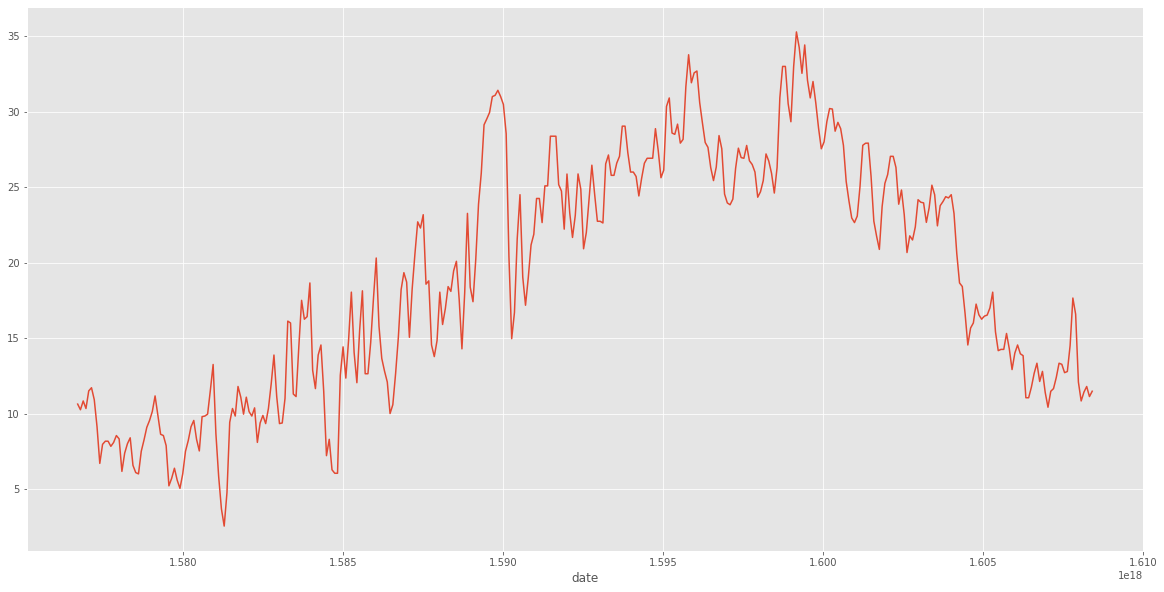

In [266]:
seasonal.groupby("date")["temp"].mean().plot(figsize=(20,10))

In [181]:
winter_begin="2019-12-19"
winter_end="2020-3-20"

spring_begin="2020-3-21"
spring_end="2020-6-20"

summer_begin="2020-6-21"
summer_end="2020-9-21"

fall_begin="2020-9-22"
fall_end="2020-12-20"

In [182]:
seasonal.loc[(seasonal.date<=winter_end) & (seasonal.date>= winter_begin)]

,date,time,temp,wspeed,humidity,pressure,visibility
444,2019-12-19,00:00,8,0.0,87,1027,4.0
445,2019-12-19,01:00,7,0.0,93,1027,4.0
446,2019-12-19,02:00,7,0.0,93,1027,4.0
447,2019-12-19,03:00,7,0.0,93,1027,4.0
448,2019-12-19,04:00,6,0.0,93,1027,4.0
...,...,...,...,...,...,...,...
2740,2020-03-20,18:00,6,13.0,93,1012,3.0
2741,2020-03-20,19:00,6,9.0,87,1012,3.0
2742,2020-03-20,20:00,6,7.0,93,1012,4.0
2743,2020-03-20,21:00,6,15.0,87,1012,4.0


In [184]:
seasonal

,date,time,temp,wspeed,humidity,pressure,visibility
444,2019-12-19,00:00,8,0.0,87,1027,4.0
445,2019-12-19,01:00,7,0.0,93,1027,4.0
446,2019-12-19,02:00,7,0.0,93,1027,4.0
447,2019-12-19,03:00,7,0.0,93,1027,4.0
448,2019-12-19,04:00,6,0.0,93,1027,4.0
...,...,...,...,...,...,...,...
9148,2020-12-20,19:00,14,0.0,44,1023,7.0
9149,2020-12-20,20:00,12,0.0,54,1023,16.0
9150,2020-12-20,21:00,12,0.0,51,1023,16.0
9151,2020-12-20,22:00,12,0.0,54,1023,16.0


In [185]:
# seasonal=seasonal.drop_duplicates()

In [189]:
seasonal

,date,time,temp,wspeed,humidity,pressure,visibility
444,2019-12-19,00:00,8,0.0,87,1027,4.0
445,2019-12-19,01:00,7,0.0,93,1027,4.0
446,2019-12-19,02:00,7,0.0,93,1027,4.0
447,2019-12-19,03:00,7,0.0,93,1027,4.0
448,2019-12-19,04:00,6,0.0,93,1027,4.0
...,...,...,...,...,...,...,...
9148,2020-12-20,19:00,14,0.0,44,1023,7.0
9149,2020-12-20,20:00,12,0.0,54,1023,16.0
9150,2020-12-20,21:00,12,0.0,51,1023,16.0
9151,2020-12-20,22:00,12,0.0,54,1023,16.0


In [187]:
seasonal=seasonal[seasonal.time.str.contains(r":00")]

In [190]:
seasonal

,date,time,temp,wspeed,humidity,pressure,visibility
444,2019-12-19,00:00,8,0.0,87,1027,4.0
445,2019-12-19,01:00,7,0.0,93,1027,4.0
446,2019-12-19,02:00,7,0.0,93,1027,4.0
447,2019-12-19,03:00,7,0.0,93,1027,4.0
448,2019-12-19,04:00,6,0.0,93,1027,4.0
...,...,...,...,...,...,...,...
9148,2020-12-20,19:00,14,0.0,44,1023,7.0
9149,2020-12-20,20:00,12,0.0,54,1023,16.0
9150,2020-12-20,21:00,12,0.0,51,1023,16.0
9151,2020-12-20,22:00,12,0.0,54,1023,16.0


In [191]:
# seasonal=seasonal[seasonal.time.str.replace(r":00")]
seasonal.time=seasonal.time.str.replace(r":.*","",regex=True)

/home/roy/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [192]:
seasonal

,date,time,temp,wspeed,humidity,pressure,visibility
444,2019-12-19,00,8,0.0,87,1027,4.0
445,2019-12-19,01,7,0.0,93,1027,4.0
446,2019-12-19,02,7,0.0,93,1027,4.0
447,2019-12-19,03,7,0.0,93,1027,4.0
448,2019-12-19,04,6,0.0,93,1027,4.0
...,...,...,...,...,...,...,...
9148,2020-12-20,19,14,0.0,44,1023,7.0
9149,2020-12-20,20,12,0.0,54,1023,16.0
9150,2020-12-20,21,12,0.0,51,1023,16.0
9151,2020-12-20,22,12,0.0,54,1023,16.0


In [193]:
seasonal.time=seasonal.time.astype(int)

/home/roy/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [248]:
seasonal[(seasonal.date=="2020-12-14")]#& (seasonal.time=="")

,date,time,temp,wspeed,humidity,pressure,visibility
8983,2020-12-14,0,15,0.0,36,1015,7.0
8984,2020-12-14,1,15,0.0,39,1014,7.0
8985,2020-12-14,2,15,0.0,36,1014,8.0
8986,2020-12-14,3,15,0.0,36,1013,8.0
8987,2020-12-14,4,16,7.0,36,1013,8.0
8988,2020-12-14,5,15,7.0,39,1013,8.0
8989,2020-12-14,6,14,0.0,41,1013,8.0
8990,2020-12-14,7,13,4.0,47,1013,6.0
8991,2020-12-14,8,13,6.0,47,1013,5.0
8992,2020-12-14,9,14,2.0,48,1013,4.0


In [230]:
gro=seasonal.groupby("date").count()
gro[gro.time<24].count

<bound method DataFrame.count of             time  temp  wspeed  humidity  pressure  visibility
date                                                          
2019-12-27    23    23      23        23        23          23
2019-12-31    23    23      23        23        23          23
2020-01-03    22    22      22        22        22          22
2020-01-07    23    23      23        23        23          23
2020-01-08    23    23      23        23        23          23
...          ...   ...     ...       ...       ...         ...
2020-12-07    23    23      23        23        23          23
2020-12-09    23    23      23        23        23          18
2020-12-11    23    23      23        23        23          23
2020-12-13    23    23      23        23        23          23
2020-12-20    23    23      23        23        23          23

[153 rows x 6 columns]>

In [328]:
seasonal.date.reset_index().loc[2212]

index                   4316
date     2020-03-18 00:00:00
Name: 2212, dtype: object

In [246]:
seasonal.isnull().sum()

date          0
time          0
temp          0
wspeed        0
humidity      0
pressure      0
visibility    0
dtype: int64

In [232]:
seasonal.fillna(method="ffill",inplace=True)

/home/roy/.local/lib/python3.8/site-packages/pandas/core/frame.py:5171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [98]:
newdate=seasonal[seasonal.date.dt.date<pd.to_datetime("2020-3-20")]

/home/roy/.local/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [99]:
newdate.tail()

,date,time,temp,wspeed,humidity,pressure,visibility
2717,2020-03-19,19,8,22.0,82,1013,5.0
2718,2020-03-19,20,7,19.0,87,1013,5.0
2719,2020-03-19,21,7,22.0,87,1013,5.0
2720,2020-03-19,22,7,15.0,87,1014,5.0
2721,2020-03-19,23,7,15.0,87,1014,5.0


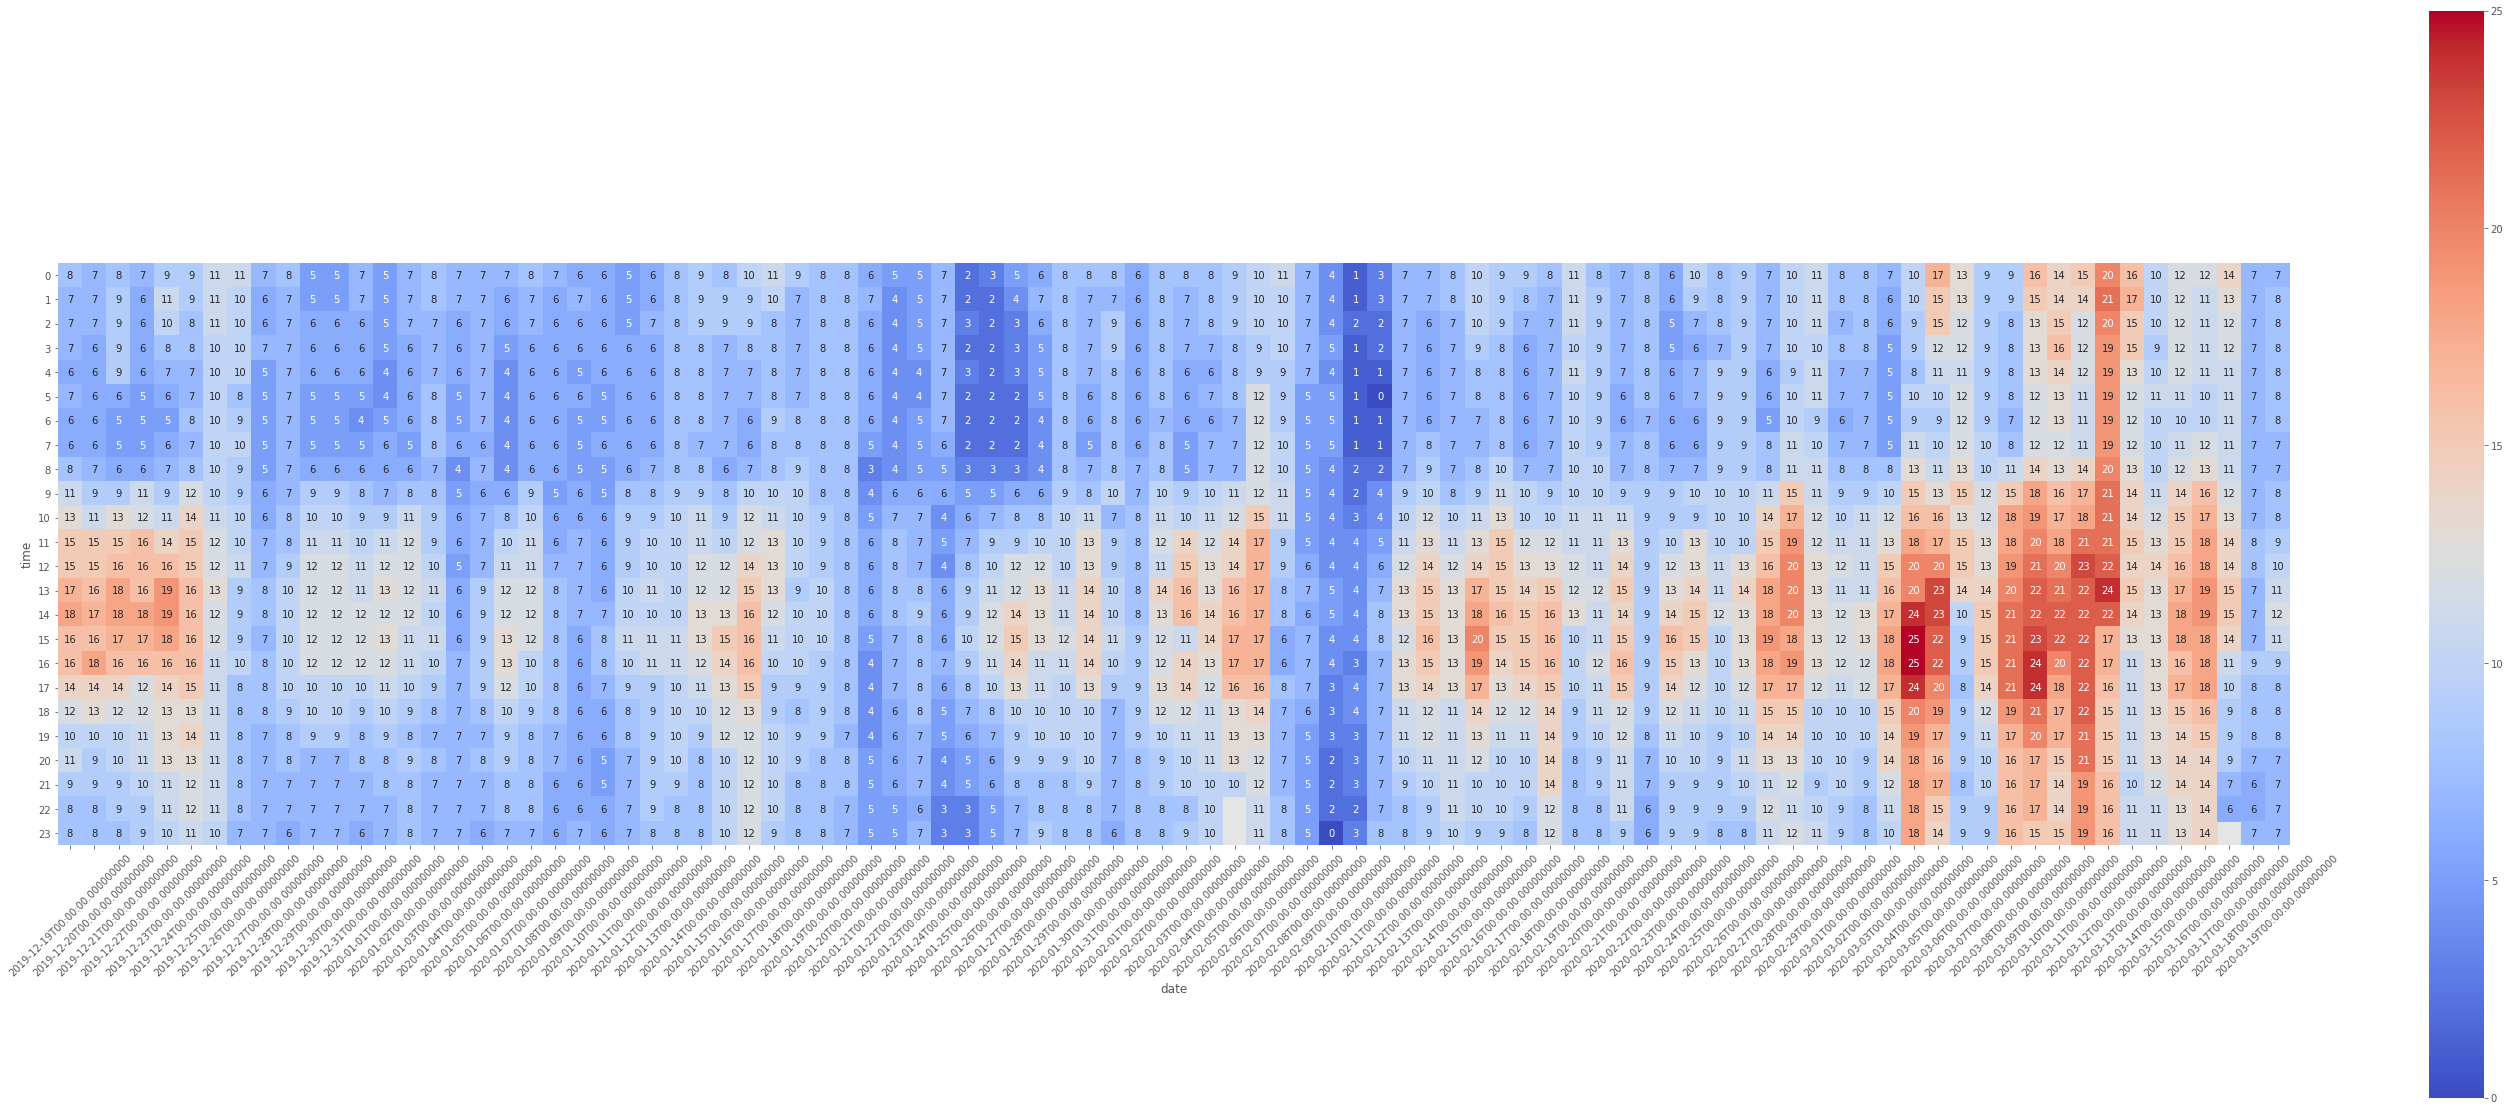

In [245]:
pivot_i=(seasonal.pivot_table(index="time",columns=newdate.date,values="temp"))
# # fill missing values
pivot_i.fillna(method="bfill",inplace=True)
fig,ax=plt.subplots(figsize=(50,20))
x=sns.heatmap(pivot_i,annot=True,square=True,cmap="coolwarm",yticklabels=True,xticklabels=True,ax=ax)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
xf=x.get_figure()

In [320]:
seasonal.isnull().sum()

date            0
time            0
temp            0
wspeed         10
humidity        0
pressure        0
visibility    242
dtype: int64